In [1]:
import tensorflow as tf

In [2]:
# More imports
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
### build the dataset
# This is a nonlinear AND long-distance dataset
# (Actually, we will test long-distance vs. short-distance patterns)

# Start with a small T and increase it later
T = 10
D = 1
X = []
Y = []

def get_label(x, i1, i2, i3):
  # x = sequence
  if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
    return 1
  if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
    return 1
  return 0

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, -1, -2, -3) # short distance
#   y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [4]:
# Try a linear model first - note: it is classification now!
i = Input(shape=(T,))
x = Dense(1, activation='sigmoid')(i)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(learning_rate=0.01),
  metrics=['accuracy'],
)

# train the network
r = model.fit(
  X, Y,
  epochs=100,
  validation_split=0.5,
)

Epoch 1/100
79/79 [==============================] - 2s 6ms/step - loss: 0.7383 - accuracy: 0.4988 - val_loss: 0.7009 - val_accuracy: 0.4880
Epoch 2/100
79/79 [==============================] - 0s 5ms/step - loss: 0.6970 - accuracy: 0.4896 - val_loss: 0.6955 - val_accuracy: 0.4912
Epoch 3/100
79/79 [==============================] - 0s 5ms/step - loss: 0.6954 - accuracy: 0.4996 - val_loss: 0.6952 - val_accuracy: 0.4980
Epoch 4/100
79/79 [==============================] - 0s 5ms/step - loss: 0.6957 - accuracy: 0.4980 - val_loss: 0.6960 - val_accuracy: 0.4944
Epoch 5/100
79/79 [==============================] - 0s 5ms/step - loss: 0.6961 - accuracy: 0.5024 - val_loss: 0.6962 - val_accuracy: 0.4800
Epoch 6/100
79/79 [==============================] - 0s 5ms/step - loss: 0.6956 - accuracy: 0.4936 - val_loss: 0.6957 - val_accuracy: 0.4848
Epoch 7/100
79/79 [==============================] - 0s 5ms/step - loss: 0.6949 - accuracy: 0.5020 - val_loss: 0.6959 - val_accuracy: 0.4956
Epoch 8/100
7

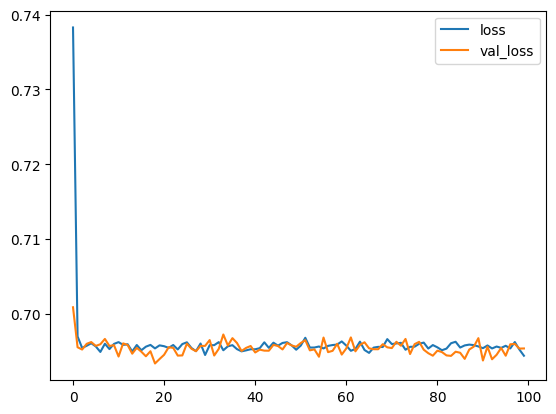

In [5]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

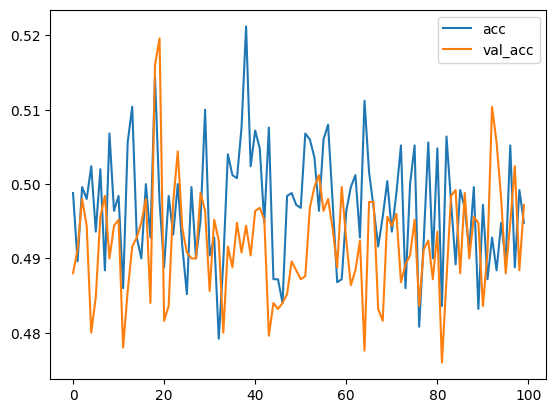

In [6]:
# Plot the accuracy too - should be around 50%
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [7]:
# Now try a simple RNN
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
# x = LSTM(5)(i)
x = SimpleRNN(5)(i)
# x = GRU(5)(i)

# method 2
# x = LSTM(5, return_sequences=True)(i)
# x = GlobalMaxPool1D()(x)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  # optimizer='rmsprop',
#   optimizer='adam',
  optimizer=Adam(learning_rate=0.01),
  # optimizer=SGD(learning_rate=0.1, momentum=0.9),
  metrics=['accuracy'],
)

In [8]:
# train the RNN
r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 2s 22ms/step - loss: 0.6958 - accuracy: 0.5200 - val_loss: 0.6855 - val_accuracy: 0.5584
Epoch 2/200
79/79 [==============================] - 1s 19ms/step - loss: 0.6865 - accuracy: 0.5500 - val_loss: 0.6779 - val_accuracy: 0.5848
Epoch 3/200
79/79 [==============================] - 1s 19ms/step - loss: 0.6741 - accuracy: 0.5828 - val_loss: 0.6587 - val_accuracy: 0.6204
Epoch 4/200
79/79 [==============================] - 1s 19ms/step - loss: 0.6420 - accuracy: 0.6624 - val_loss: 0.6114 - val_accuracy: 0.6984
Epoch 5/200
79/79 [==============================] - 2s 19ms/step - loss: 0.5782 - accuracy: 0.7392 - val_loss: 0.5243 - val_accuracy: 0.7908
Epoch 6/200
79/79 [==============================] - 2s 19ms/step - loss: 0.4809 - accuracy: 0.8084 - val_loss: 0.4196 - val_accuracy: 0.8400
Epoch 7/200
79/79 [==============================] - 2s 20ms/step - loss: 0.3773 - accuracy: 0.8676 - val_loss: 0.3373 - val_accuracy: 0.8804
Epoch 

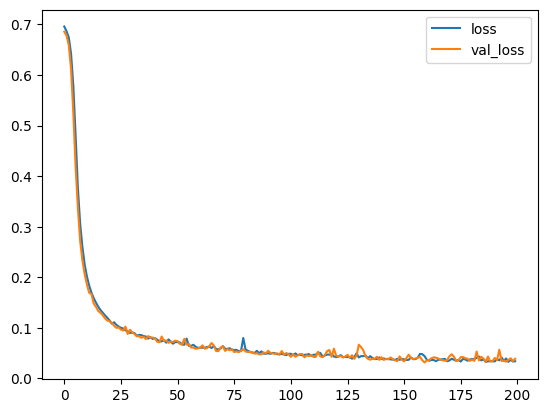

In [9]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

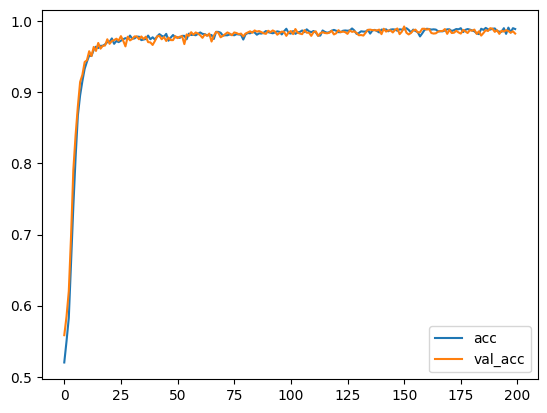

In [10]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [11]:
# Now change to the long distance problem

# Start with a small T and increase it later
T = 10
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [12]:
# Now test our Simple RNN again
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = SimpleRNN(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(learning_rate=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 2s 20ms/step - loss: 0.6972 - accuracy: 0.4984 - val_loss: 0.6995 - val_accuracy: 0.4976
Epoch 2/200
79/79 [==============================] - 1s 18ms/step - loss: 0.6958 - accuracy: 0.5096 - val_loss: 0.6957 - val_accuracy: 0.5016
Epoch 3/200
79/79 [==============================] - 2s 20ms/step - loss: 0.6949 - accuracy: 0.5116 - val_loss: 0.6938 - val_accuracy: 0.5060
Epoch 4/200
79/79 [==============================] - 1s 18ms/step - loss: 0.6934 - accuracy: 0.5180 - val_loss: 0.6920 - val_accuracy: 0.5220
Epoch 5/200
79/79 [==============================] - 1s 18ms/step - loss: 0.6897 - accuracy: 0.5296 - val_loss: 0.6958 - val_accuracy: 0.5240
Epoch 6/200
79/79 [==============================] - 1s 19ms/step - loss: 0.6809 - accuracy: 0.5540 - val_loss: 0.6697 - val_accuracy: 0.5836
Epoch 7/200
79/79 [==============================] - 2s 19ms/step - loss: 0.6528 - accuracy: 0.6196 - val_loss: 0.6330 - val_accuracy: 0.6360
Epoch 

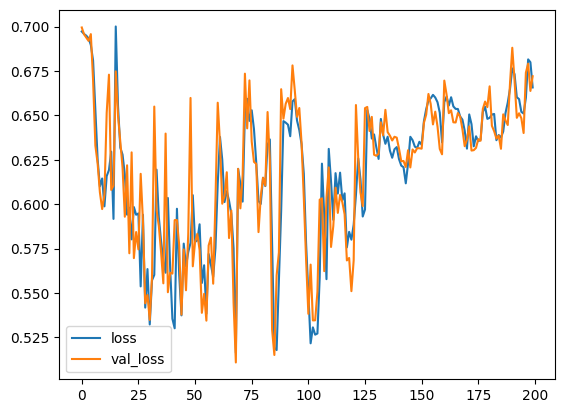

In [13]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

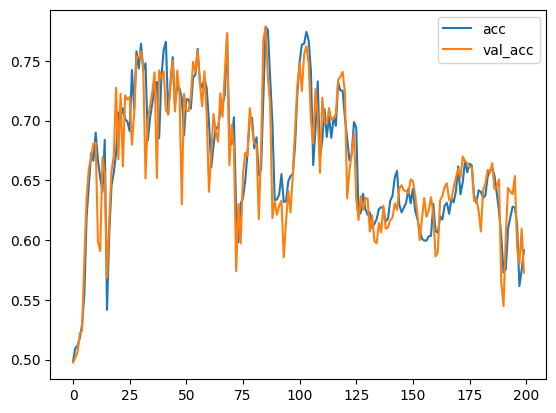

In [14]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [15]:
# Now test our LSTM
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = LSTM(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(learning_rate=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 3s 13ms/step - loss: 0.6944 - accuracy: 0.5124 - val_loss: 0.6949 - val_accuracy: 0.4980
Epoch 2/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6939 - accuracy: 0.4992 - val_loss: 0.6948 - val_accuracy: 0.5012
Epoch 3/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6928 - accuracy: 0.5072 - val_loss: 0.6931 - val_accuracy: 0.4956
Epoch 4/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6926 - accuracy: 0.5216 - val_loss: 0.6930 - val_accuracy: 0.5036
Epoch 5/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6901 - accuracy: 0.5216 - val_loss: 0.6919 - val_accuracy: 0.5196
Epoch 6/200
79/79 [==============================] - 1s 8ms/step - loss: 0.6881 - accuracy: 0.5244 - val_loss: 0.6912 - val_accuracy: 0.5052
Epoch 7/200
79/79 [==============================] - 1s 8ms/step - loss: 0.6873 - accuracy: 0.5312 - val_loss: 0.6768 - val_accuracy: 0.5372
Epoch 8/200


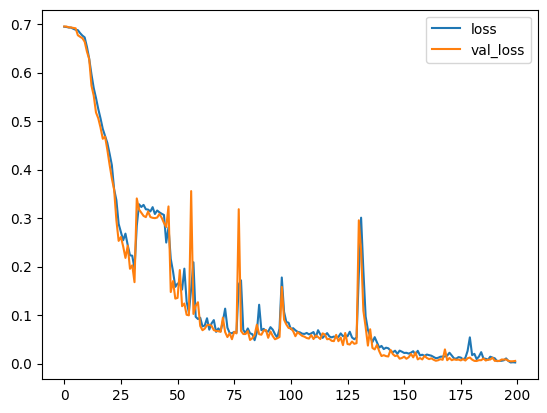

In [16]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

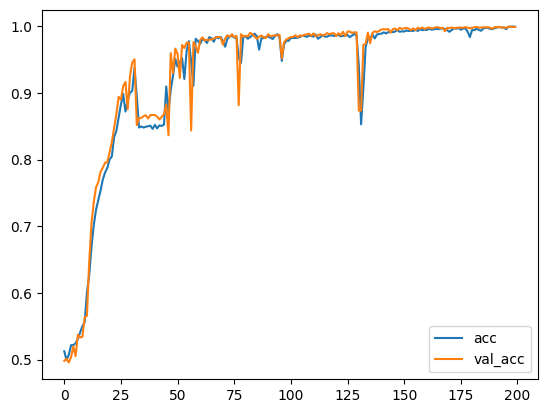

In [17]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [18]:
# Make the problem harder by making T larger
T = 20
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [19]:
# Now test our Simple RNN again
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = SimpleRNN(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(learning_rate=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 3s 31ms/step - loss: 0.7015 - accuracy: 0.5088 - val_loss: 0.7011 - val_accuracy: 0.4924
Epoch 2/200
79/79 [==============================] - 2s 28ms/step - loss: 0.6940 - accuracy: 0.5104 - val_loss: 0.6955 - val_accuracy: 0.4920
Epoch 3/200
79/79 [==============================] - 2s 29ms/step - loss: 0.6942 - accuracy: 0.5072 - val_loss: 0.7005 - val_accuracy: 0.4888
Epoch 4/200
79/79 [==============================] - 2s 29ms/step - loss: 0.6899 - accuracy: 0.5408 - val_loss: 0.6988 - val_accuracy: 0.5244
Epoch 5/200
79/79 [==============================] - 2s 27ms/step - loss: 0.6899 - accuracy: 0.5424 - val_loss: 0.6943 - val_accuracy: 0.5244
Epoch 6/200
79/79 [==============================] - 2s 26ms/step - loss: 0.6879 - accuracy: 0.5540 - val_loss: 0.6927 - val_accuracy: 0.5272
Epoch 7/200
79/79 [==============================] - 2s 25ms/step - loss: 0.6875 - accuracy: 0.5416 - val_loss: 0.6947 - val_accuracy: 0.5164
Epoch 

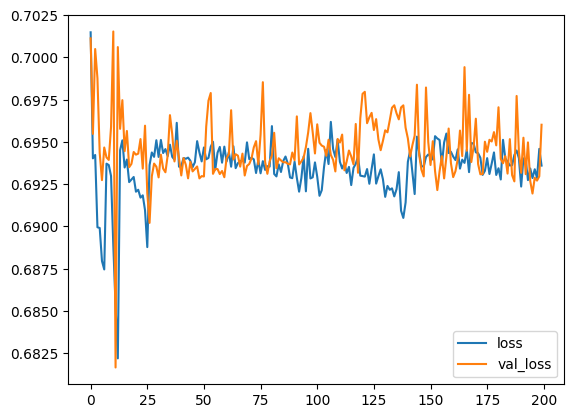

In [20]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

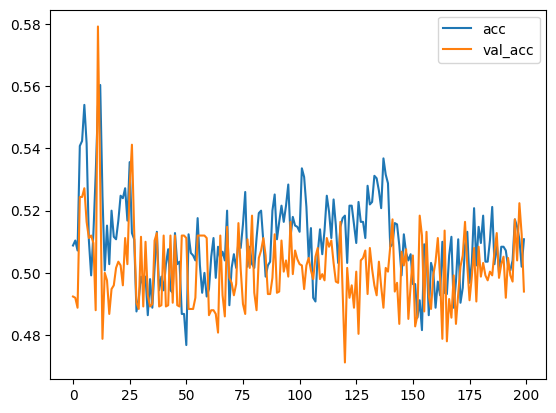

In [21]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [22]:
# Now test our LSTM
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = LSTM(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(learning_rate=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 2s 13ms/step - loss: 0.6950 - accuracy: 0.4912 - val_loss: 0.6933 - val_accuracy: 0.5028
Epoch 2/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6934 - accuracy: 0.5044 - val_loss: 0.6940 - val_accuracy: 0.4880
Epoch 3/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6937 - accuracy: 0.4904 - val_loss: 0.6932 - val_accuracy: 0.5120
Epoch 4/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6938 - accuracy: 0.5044 - val_loss: 0.6936 - val_accuracy: 0.4864
Epoch 5/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6933 - accuracy: 0.5044 - val_loss: 0.6929 - val_accuracy: 0.5096
Epoch 6/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6933 - accuracy: 0.5060 - val_loss: 0.6936 - val_accuracy: 0.4880
Epoch 7/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6929 - val_accuracy: 0.5076
Epoch 8/200


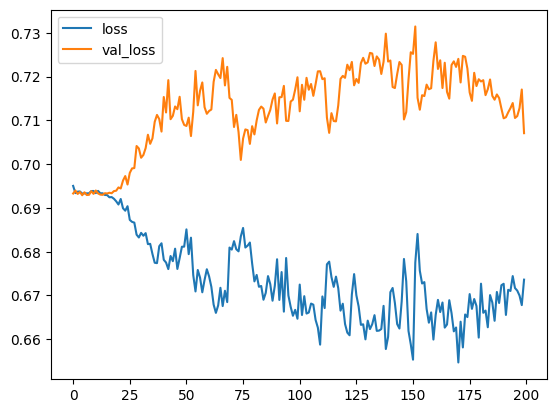

In [23]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

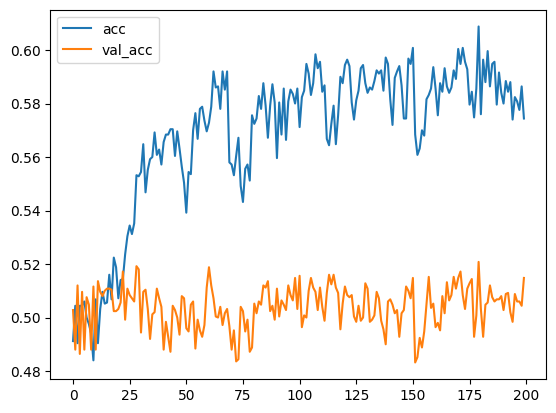

In [24]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [25]:
# Now test our GRU
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = GRU(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(learning_rate=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=400,
  validation_split=0.5,
)

Epoch 1/400
79/79 [==============================] - 2s 12ms/step - loss: 0.6955 - accuracy: 0.4952 - val_loss: 0.6936 - val_accuracy: 0.5084
Epoch 2/400
79/79 [==============================] - 1s 9ms/step - loss: 0.6957 - accuracy: 0.4928 - val_loss: 0.6961 - val_accuracy: 0.4880
Epoch 3/400
79/79 [==============================] - 1s 8ms/step - loss: 0.6945 - accuracy: 0.5004 - val_loss: 0.6933 - val_accuracy: 0.5096
Epoch 4/400
79/79 [==============================] - 1s 9ms/step - loss: 0.6948 - accuracy: 0.5136 - val_loss: 0.6950 - val_accuracy: 0.4940
Epoch 5/400
79/79 [==============================] - 1s 9ms/step - loss: 0.6935 - accuracy: 0.5144 - val_loss: 0.6941 - val_accuracy: 0.5024
Epoch 6/400
79/79 [==============================] - 1s 9ms/step - loss: 0.6941 - accuracy: 0.5028 - val_loss: 0.6945 - val_accuracy: 0.5068
Epoch 7/400
79/79 [==============================] - 1s 9ms/step - loss: 0.6932 - accuracy: 0.5164 - val_loss: 0.6945 - val_accuracy: 0.4996
Epoch 8/400


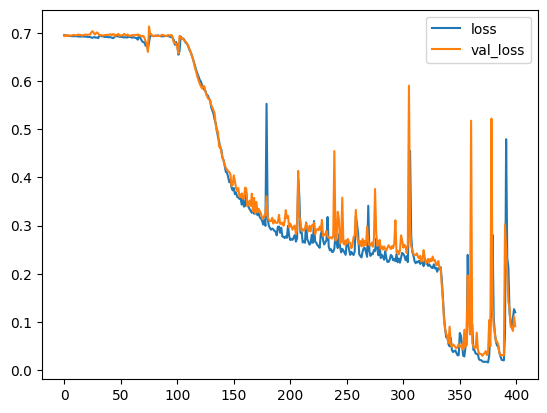

In [26]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

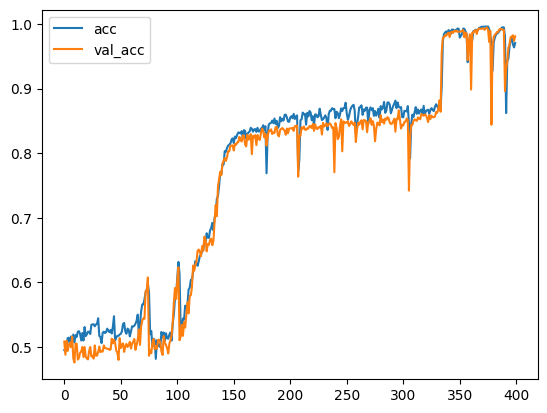

In [27]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [28]:
# Make the problem harder by making T larger
T = 30
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [29]:
# Now test our LSTM
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = LSTM(15)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(learning_rate=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=400,
  validation_split=0.5,
)

Epoch 1/400
79/79 [==============================] - 2s 17ms/step - loss: 0.6937 - accuracy: 0.5212 - val_loss: 0.6961 - val_accuracy: 0.5100
Epoch 2/400
79/79 [==============================] - 1s 10ms/step - loss: 0.6931 - accuracy: 0.5076 - val_loss: 0.6933 - val_accuracy: 0.4908
Epoch 3/400
79/79 [==============================] - 1s 10ms/step - loss: 0.6930 - accuracy: 0.5120 - val_loss: 0.6938 - val_accuracy: 0.5044
Epoch 4/400
79/79 [==============================] - 1s 10ms/step - loss: 0.6931 - accuracy: 0.5156 - val_loss: 0.6938 - val_accuracy: 0.4868
Epoch 5/400
79/79 [==============================] - 1s 10ms/step - loss: 0.6923 - accuracy: 0.5164 - val_loss: 0.6972 - val_accuracy: 0.4824
Epoch 6/400
79/79 [==============================] - 1s 10ms/step - loss: 0.6946 - accuracy: 0.5144 - val_loss: 0.6957 - val_accuracy: 0.4888
Epoch 7/400
79/79 [==============================] - 1s 9ms/step - loss: 0.6924 - accuracy: 0.5268 - val_loss: 0.6959 - val_accuracy: 0.5028
Epoch 8

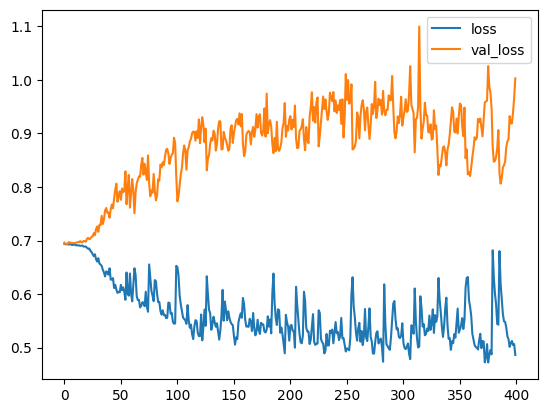

In [30]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

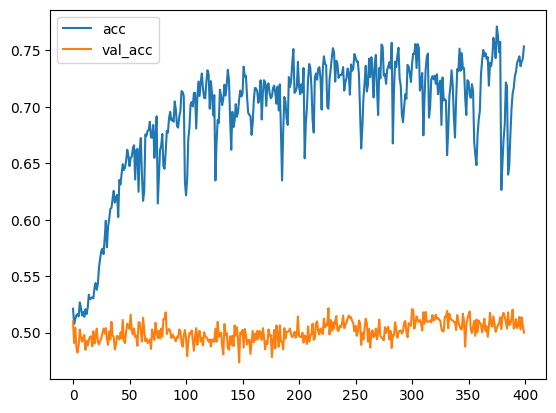

In [31]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [32]:
# Now try a LSTM with Global Max Pooling
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 2
x = LSTM(5, return_sequences=True)(i)
x = GlobalMaxPool1D()(x)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(learning_rate=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=100,
  validation_split=0.5,
)

Epoch 1/100
79/79 [==============================] - 2s 15ms/step - loss: 0.6933 - accuracy: 0.4948 - val_loss: 0.6956 - val_accuracy: 0.4920
Epoch 2/100
79/79 [==============================] - 1s 10ms/step - loss: 0.6929 - accuracy: 0.5136 - val_loss: 0.6935 - val_accuracy: 0.5108
Epoch 3/100
79/79 [==============================] - 1s 10ms/step - loss: 0.6933 - accuracy: 0.5040 - val_loss: 0.6937 - val_accuracy: 0.4976
Epoch 4/100
79/79 [==============================] - 1s 10ms/step - loss: 0.6931 - accuracy: 0.5028 - val_loss: 0.6948 - val_accuracy: 0.4928
Epoch 5/100
79/79 [==============================] - 1s 10ms/step - loss: 0.6925 - accuracy: 0.5152 - val_loss: 0.6938 - val_accuracy: 0.4980
Epoch 6/100
79/79 [==============================] - 1s 10ms/step - loss: 0.6924 - accuracy: 0.5068 - val_loss: 0.6944 - val_accuracy: 0.4824
Epoch 7/100
79/79 [==============================] - 1s 10ms/step - loss: 0.6928 - accuracy: 0.5072 - val_loss: 0.6934 - val_accuracy: 0.5060
Epoch 

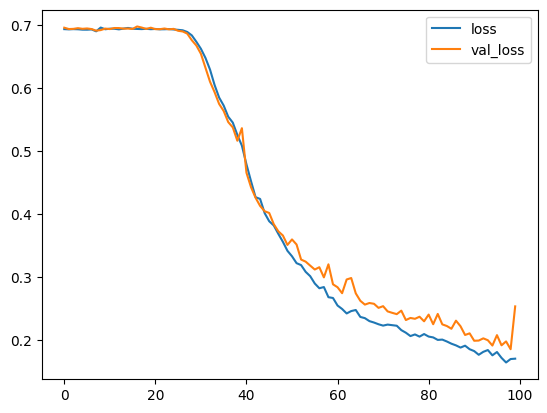

In [33]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

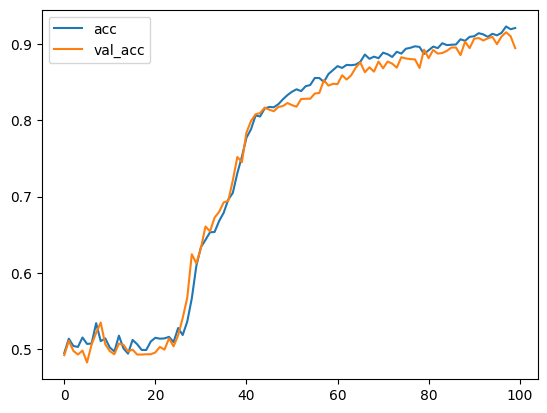

In [34]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()